In [1]:
import os
import json
import glob
import shutil
import cv2
from math import dist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
degrees = ['15cm_0mm_0deg', '15cm_25mm_5deg', '15cm_50mm_10deg', '20cm_0mm_0deg', '20cm_25mm_5deg', '20cm_50mm_10deg']

In [3]:
mmpose_result="../mmpose/result"
names = os.listdir(mmpose_result)

result="../mmpose/k_fold/result"
ear_types = ["free", "attached"]

final = "../7_final"



for ear_type in ear_types:
    for deg in degrees:

        differen_angle = {}
        for k in range(0,4):
            differen_angle[k] = {}
            if ear_type == "free":
                for l in range(0,21):
                    differen_angle[k][l] = []
            else:
                for l in range(0,14):
                    differen_angle[k][l] = []

        for name in names:

            error_deg = os.path.join(result, ear_type, name, "error", deg)
            file_num = len(os.listdir(error_deg))
            interval = file_num / 4
            x = np.arange(0, file_num, interval)
            x = [int(num) for num in x]

            angle = 0
            if len(x) > 4:
                x.pop(4)
            print(len(x))
            for i in x :

                file = os.path.join(mmpose_result_name_localization_error_deg, "test_{index}.json".format(index = i))
                with open(file,"r") as f:
                    error_f = json.load(f)

                for j in range(0,len(error_f)):
    #                 print(error_f[str(j)])
                    if error_f[str(j)]:
                        differen_angle[angle][j].append(error_f[str(j)][0])
                    else:
                        print(87)
                angle += 1


        final_deg = os.path.join(final, deg)
        if not os.path.isdir(final_deg):
            os.makedirs(final_deg)
        with open(os.path.join(final_deg, "different_angle.json"), "w") as w_file:
            json.dump(differen_angle, w_file, indent = 4)

4
4
4
4
4
4
4
4
4
4
4
4
4
4
87
4
4
4
4
4
4
4
4
87
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
87
4
4


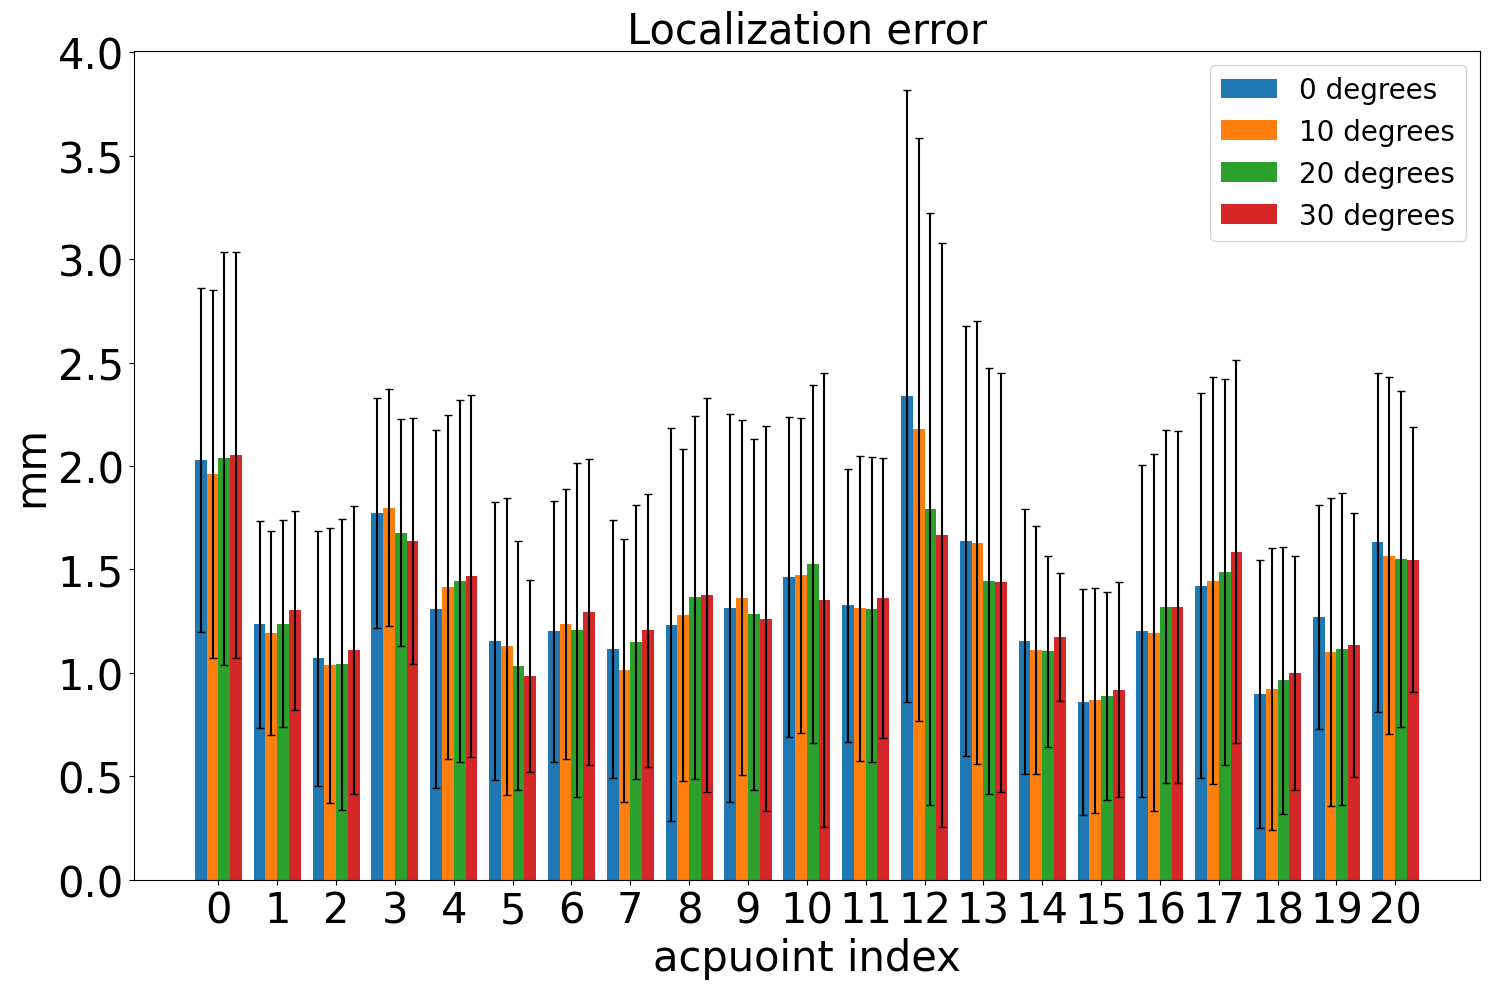

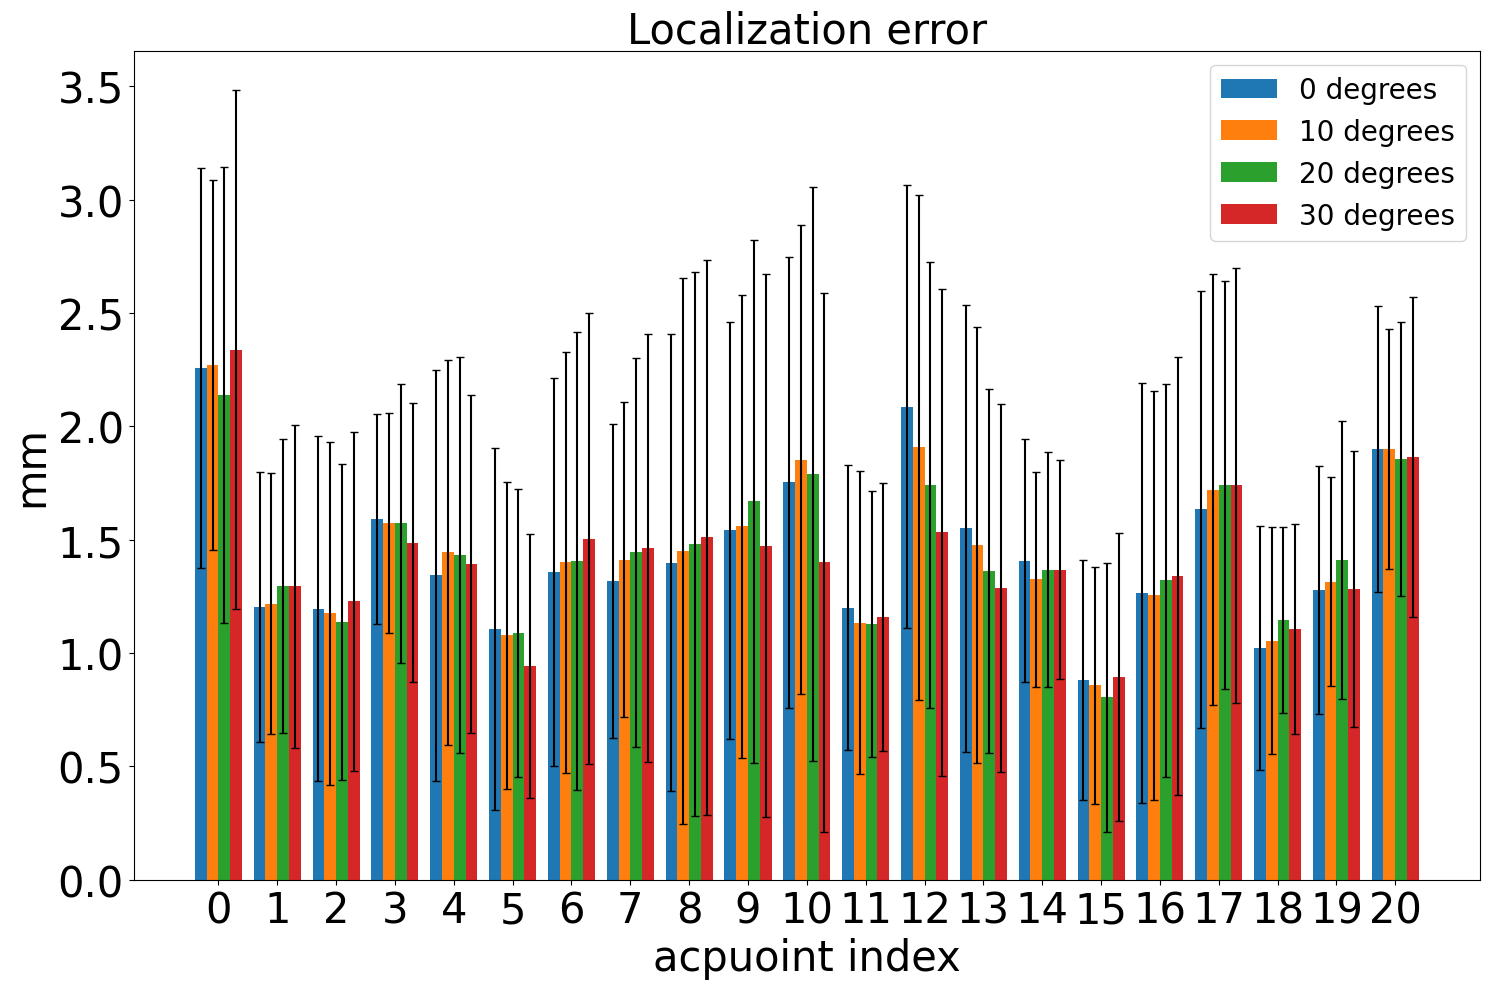

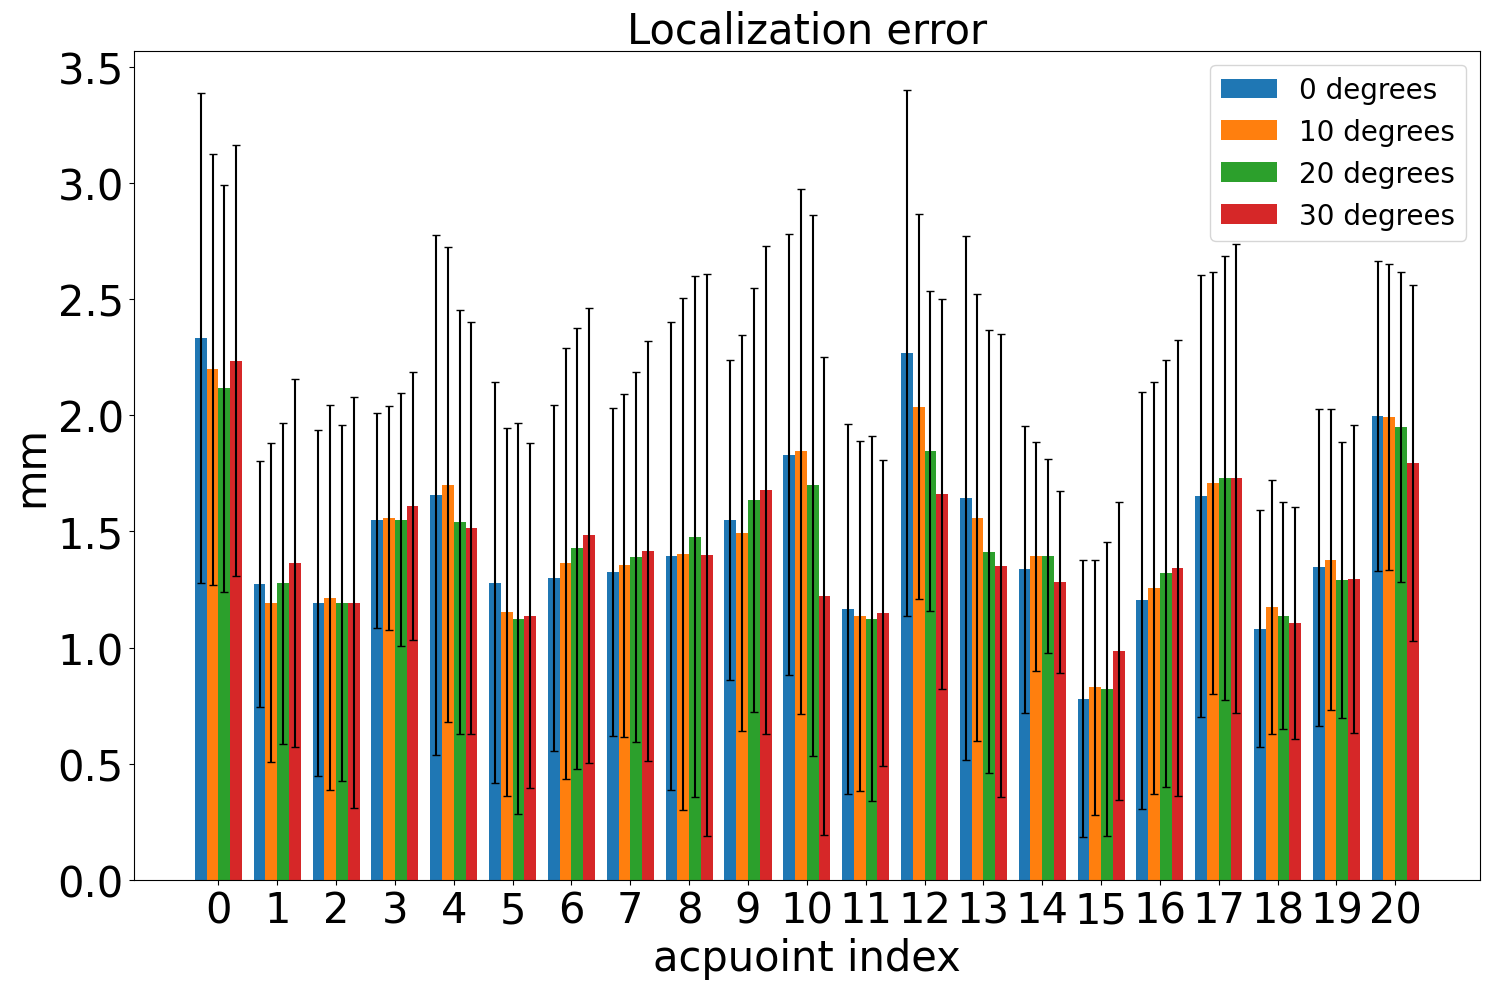

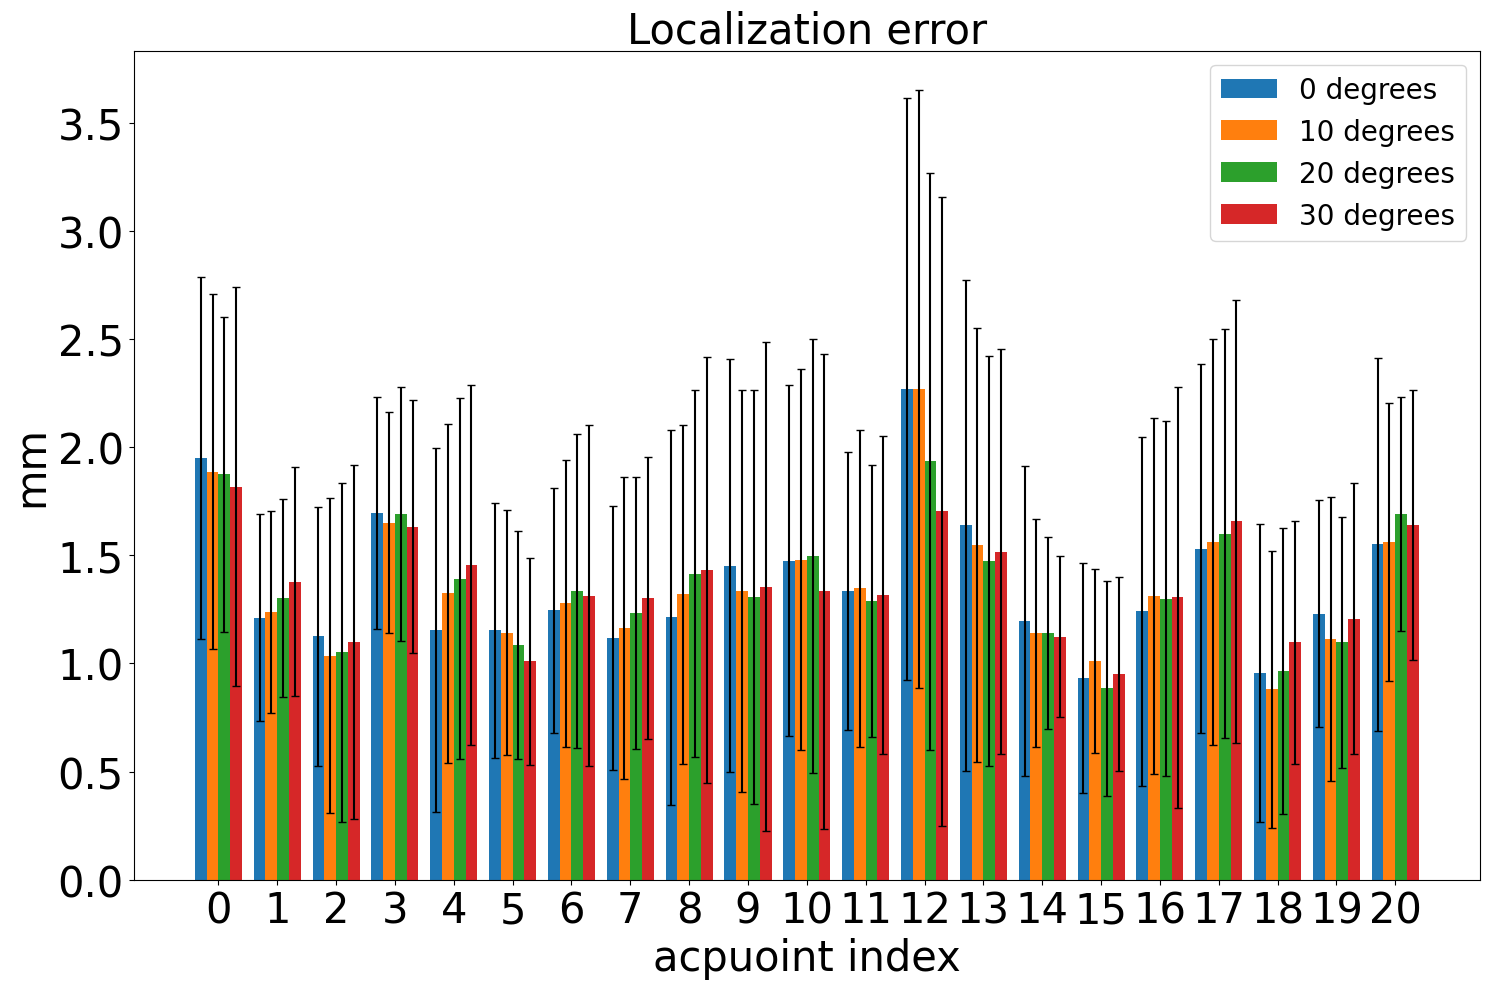

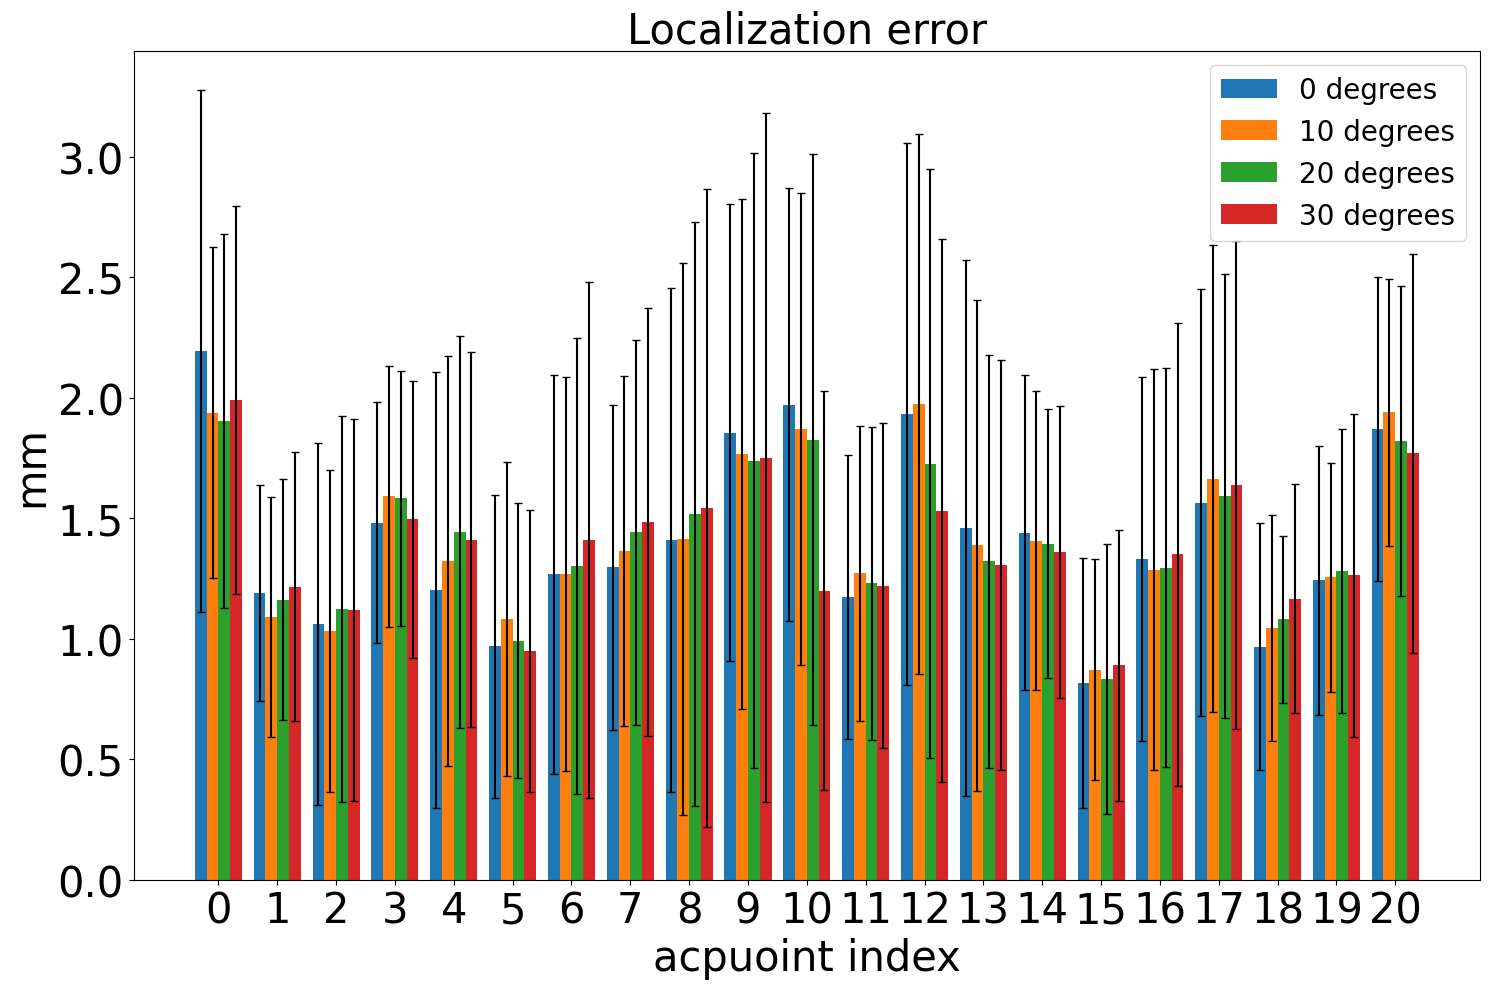

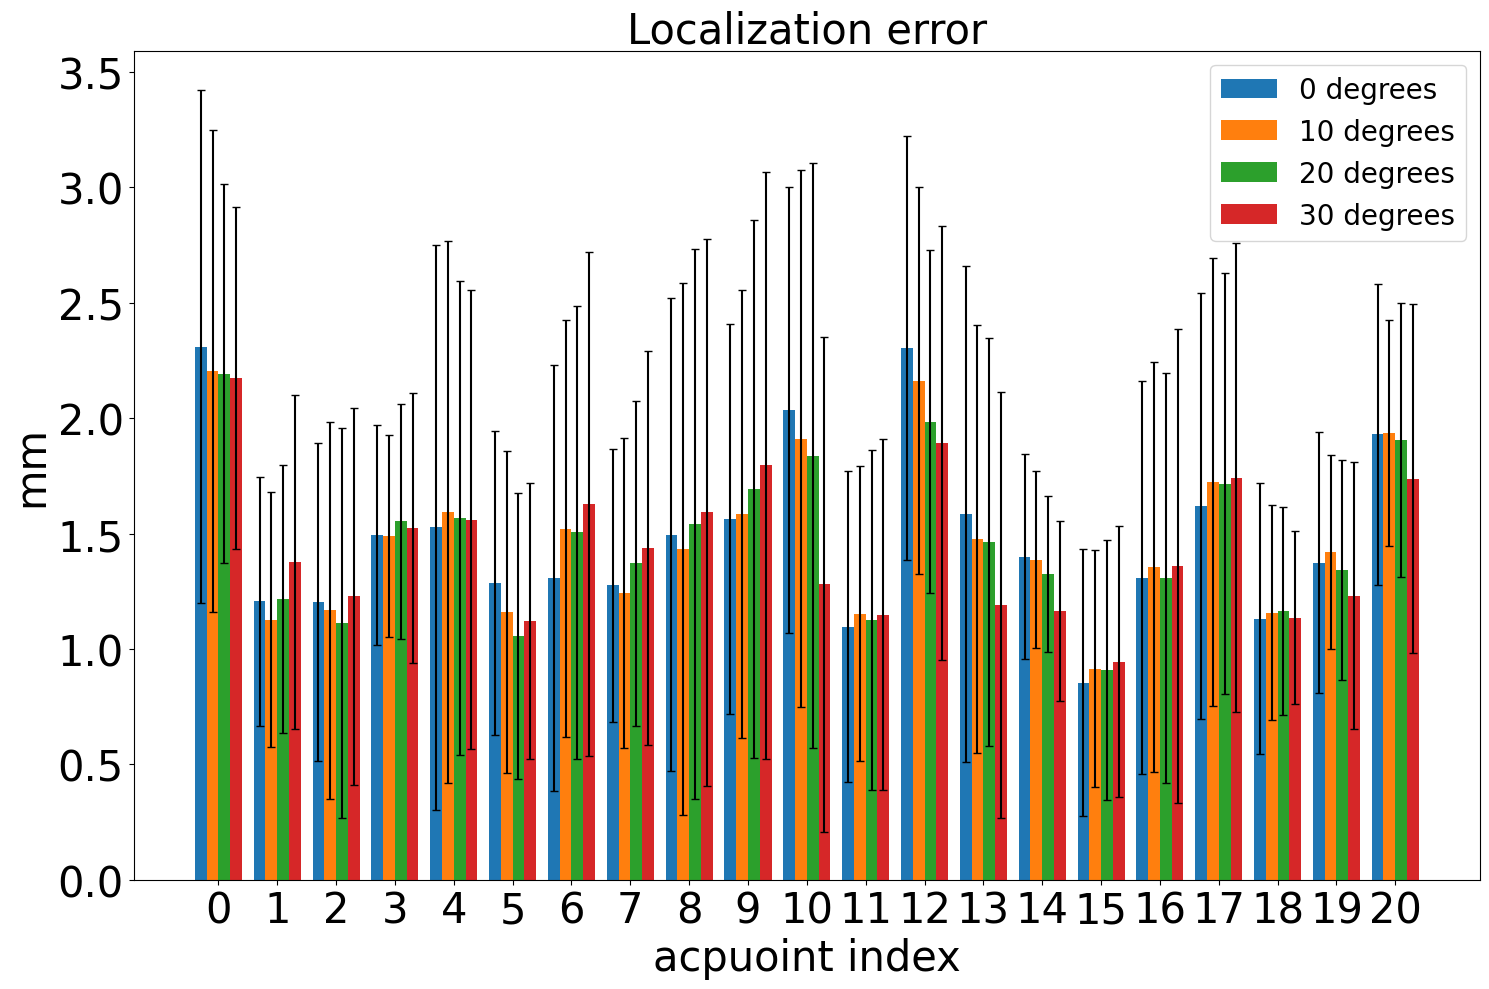

In [4]:
final = "../7_final"
width=0.25

for deg in degrees:
    json_file = os.path.join(final, deg, "different_angle.json")

    with open(json_file, "r") as f:
        result = json.load(f)
    

    means = []
    stds = []
    
    for j in range(0 ,len(result)):
        mean = []
        std = []

        for k in range(0 , 21):

            acupoint_errors = np.array(result[str(j)][str(k)])
            mean.append(np.mean(acupoint_errors)*10.00)
            std.append(np.std(acupoint_errors)*10.00)


        means.append(mean)
        stds.append(std)

    plt.figure(figsize=(15,10))

    for l in range(0 ,len(means)):

        plt.bar(np.arange(21) + l*0.2, means[l], yerr=stds[l], align='center', label = '{index} degrees'.format(index = 0 + 10*l), ecolor='black', capsize=3, width=0.2)
    
    plt.xlabel('acpuoint index' , fontsize = 30)
    plt.ylabel('mm' , fontsize = 30)

    plt.xticks(np.arange(21) + 0.3, [str(x) for x in list(range(0 , 21))], fontsize=30)
    
    
    plt.yticks(fontsize=30)
    plt.title('Localization error', fontsize = 30)

    plt.legend(fontsize=20)

    plt.tight_layout()
    plt.savefig(os.path.join(final, deg,'{index}.png').format(index = 0))
    plt.show()
        
        


0.22165977132714784
0.14163158768016967


In [ ]:
mmpose_result="../../../mmpose/result"

all_name_acu = {}
for i in range(0 ,21):
    all_name_acu[i] = []
for name in os.listdir(mmpose_result):
    mmpose_result_name = os.path.join(mmpose_result, name)
    mmpose_result_name_localization_error = os.path.join(mmpose_result_name, "localization_error")
    with open(os.path.join(mmpose_result_name_localization_error, "localization_error.json"), "r") as localization_error_file:
        localization_error = json.load(localization_error_file)

    for i in range(0 ,len(localization_error)):
        acupoints = np.array(localization_error[str(i)])
        all_name_acu[i].append(np.mean(acupoints))

mean = []
std = []
for i in range(0 ,len(localization_error)):
    mean.append(np.mean(np.array(all_name_acu[i])))
    std.append(np.std(np.array(all_name_acu[i])))

print(mean)
fig, ax = plt.subplots()
ax.bar(np.arange(21), mean, yerr=std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('cm')
ax.set_xticks(np.arange(21))
ax.set_xticklabels(list(range(0, 21)))
ax.set_title('Localization error')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()